### Activity 6
### 63010026 กฤตศยา นทีมณฑล
### 63010339 ณัฐวดี ติณภูมิ

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from time import time
import pandas_datareader.data as web

### Get Data

In [51]:
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']
stk_data = web.DataReader(stk_tickers, 'yahoo')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

In [52]:
base = stk_data.loc[:, ('Adj Close', 'MSFT')]
X1 = stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]
X2 = ccy_data
X3 = idx_data

### Standardize Data

In [53]:
scaler = preprocessing.StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(X1.values),index = X1.index, columns=X1.columns)
X2 = pd.DataFrame(scaler.fit_transform(X2.values),index = X2.index, columns=X2.columns)
X3 = pd.DataFrame(scaler.fit_transform(X3.values),index = X3.index, columns=X3.columns)

## Calculate

In [54]:
backHistory = [30, 45, 60, 90, 180, 240]
return_period = 1
Y = base.shift(-return_period)
BH1, BH2, BH3 = backHistory[0], backHistory[1], backHistory[2]
X4_BH1 = base.diff(BH1).shift(-BH1)
X4_BH2 = base.diff(BH2).shift(-BH2)
X4_BH3 = base.diff(BH3).shift(-BH3)

In [55]:
X4 = pd.concat([X4_BH1, X4_BH2, X4_BH3], axis=1)
X4.columns = ['MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']
X4 = pd.DataFrame(scaler.fit_transform(X4.values), index = X4.index,columns=X4.columns)

### Forming DataSet

In [56]:
X = pd.concat([X1, X2, X3, X4], axis=1)
dataset = pd.concat([Y, X], axis=1)

In [57]:
#X,Y
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-05,71.413391,-1.092817,-0.458042,NaN,NaN,NaN,NaN,NaN,0.179853,0.065631,0.024457
2017-10-06,71.685860,-1.079391,-0.474728,0.069148,-0.047340,-1.228489,-1.432492,-1.267501,0.130595,0.121347,0.041696
2017-10-09,71.685860,-1.081504,-0.411466,NaN,NaN,-1.235207,-1.435572,-1.189111,0.121184,0.124642,0.063654
2017-10-10,71.808052,-1.088670,-0.334302,0.004519,0.199744,-1.226576,-1.418558,-1.217931,0.191823,0.112320,0.113954
2017-10-11,72.465805,-1.060308,-0.395476,0.028907,0.191616,-1.219858,-1.408241,-1.244445,0.147933,0.070035,0.112120
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28,237.500000,0.521206,0.665123,3.906664,-3.673937,0.479818,0.256489,1.099167,NaN,NaN,NaN
2022-09-29,232.899994,0.437630,0.560897,3.943247,-3.322819,0.365070,0.144512,1.290529,NaN,NaN,NaN
2022-09-30,240.740005,0.381383,0.300793,3.974951,-3.183022,0.284964,0.022276,1.265168,NaN,NaN,NaN
2022-10-03,248.880005,0.476399,0.549829,NaN,NaN,0.420509,0.209352,1.089944,NaN,NaN,NaN


## Data Prepation

In [58]:
dataset = dataset.dropna()

In [59]:
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-06,71.685860,-1.079391,-0.474728,0.069148,-0.047340,-1.228489,-1.432492,-1.267501,0.130595,0.121347,0.041696
2017-10-10,71.808052,-1.088670,-0.334302,0.004519,0.199744,-1.226576,-1.418558,-1.217931,0.191823,0.112320,0.113954
2017-10-11,72.465805,-1.060308,-0.395476,0.028907,0.191616,-1.219858,-1.408241,-1.244445,0.147933,0.070035,0.112120
2017-10-12,72.813461,-1.060308,-0.436493,0.032565,0.133096,-1.226152,-1.416033,-1.237528,0.115493,0.148429,0.076887
2017-10-13,72.963821,-1.056781,-0.431626,-0.021089,0.344417,-1.222881,-1.408526,-1.272112,0.129850,0.103534,0.041112
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-05,265.646118,0.941089,1.877801,2.878693,-1.885834,0.643900,0.570348,0.794831,1.601058,-0.631832,-1.504718
2022-07-06,267.831482,0.982687,1.919702,2.871376,-1.926473,0.663894,0.587424,0.701456,1.341913,-0.797622,-1.846137
2022-07-07,267.093079,1.116504,2.170192,2.911617,-1.785050,0.747928,0.672207,0.626525,1.132266,-0.584652,-2.180776
2022-07-08,263.949738,1.134634,2.137401,2.932347,-1.716777,0.743196,0.660866,0.460524,0.925996,-0.418547,-1.757708


In [60]:
dataset.describe()

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
count,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000
mean,179.153362,-0.040190,-0.058747,-0.159055,0.106302,-0.042788,-0.037701,-0.023061,0.039173,0.021017,-0.001291
std,78.103420,1.004987,0.975444,0.707814,0.885152,1.002793,1.006637,1.019905,0.944351,0.985546,1.002448
min,71.685860,-1.092261,-3.292971,-1.169783,-2.601075,-1.684048,-2.454607,-1.326293,-3.933242,-3.765246,-3.331276
25%,104.600014,-0.845803,-0.632638,-0.553366,-0.498023,-0.875202,-0.817791,-0.697160,-0.331769,-0.414053,-0.426529
50%,161.369637,-0.516983,-0.160840,-0.297898,0.058321,-0.442217,-0.418157,-0.251897,0.068089,0.071322,0.053914
75%,246.867172,0.898173,0.638189,0.020676,0.801196,0.848582,0.976413,0.424211,0.477644,0.518537,0.539388
max,340.882812,2.103388,2.356923,3.070142,2.015481,2.053486,1.995783,7.152440,3.029366,2.555411,2.533019


In [61]:
Y_dataset = dataset.iloc[:, 0]
Y_dataset = Y_dataset.reset_index()
Y_dataset = Y_dataset.drop(columns=['index'])
Y_dataset

C:\Users\ROG\AppData\Local\Temp\ipykernel_8744\2095979799.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  Y_dataset = Y_dataset.drop(columns=['index'])


,Adj Close
,MSFT
0,71.685860
1,71.808052
2,72.465805
3,72.813461
4,72.963821
...,...
1175,265.646118
1176,267.831482
1177,267.093079


In [62]:
X_dataset = dataset.drop(dataset.columns[0],axis=1)
X_dataset = X_dataset.reset_index()
X_dataset = X_dataset.drop(columns=['index'])
X_dataset

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-1.079391,-0.474728,0.069148,-0.047340,-1.228489,-1.432492,-1.267501,0.130595,0.121347,0.041696
1,-1.088670,-0.334302,0.004519,0.199744,-1.226576,-1.418558,-1.217931,0.191823,0.112320,0.113954
2,-1.060308,-0.395476,0.028907,0.191616,-1.219858,-1.408241,-1.244445,0.147933,0.070035,0.112120
3,-1.060308,-0.436493,0.032565,0.133096,-1.226152,-1.416033,-1.237528,0.115493,0.148429,0.076887
4,-1.056781,-0.431626,-0.021089,0.344417,-1.222881,-1.408526,-1.272112,0.129850,0.103534,0.041112
...,...,...,...,...,...,...,...,...,...,...
1175,0.941089,1.877801,2.878693,-1.885834,0.643900,0.570348,0.794831,1.601058,-0.631832,-1.504718
1176,0.982687,1.919702,2.871376,-1.926473,0.663894,0.587424,0.701456,1.341913,-0.797622,-1.846137
1177,1.116504,2.170192,2.911617,-1.785050,0.747928,0.672207,0.626525,1.132266,-0.584652,-2.180776
1178,1.134634,2.137401,2.932347,-1.716777,0.743196,0.660866,0.460524,0.925996,-0.418547,-1.757708


<AxesSubplot:>

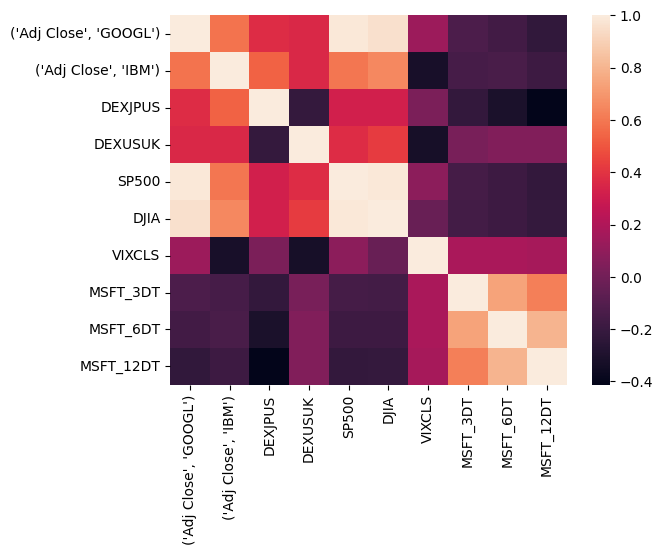

In [63]:
data_corr = X_dataset.corr()
sns.heatmap(data_corr)

In [64]:
lower = pd.DataFrame(np.tril(data_corr, -1),columns = X_dataset.columns)
lower

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.585035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.373385,0.534366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.359008,0.357694,-0.218502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.985077,0.592816,0.318805,0.375019,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.959272,0.650992,0.318781,0.421904,0.985826,0.000000,0.000000,0.000000,0.000000,0.0
6,0.135047,-0.320270,0.030602,-0.328447,0.087618,-0.032902,0.000000,0.000000,0.000000,0.0
7,-0.129688,-0.152681,-0.221960,0.020907,-0.156686,-0.161371,0.178864,0.000000,0.000000,0.0
8,-0.168696,-0.138419,-0.310165,0.045947,-0.184187,-0.185882,0.180802,0.738904,0.000000,0.0
9,-0.225593,-0.184531,-0.413193,0.047703,-0.225357,-0.218846,0.171274,0.621329,0.799769,0.0


In [65]:
#remove ถ้า >0.9
to_drop = [column for column in lower if any(lower[column] > 0.9)]
X_dataset.drop(to_drop, inplace=True, axis=1)
X_dataset

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-0.474728,0.069148,-0.047340,-1.432492,-1.267501,0.130595,0.121347,0.041696
1,-0.334302,0.004519,0.199744,-1.418558,-1.217931,0.191823,0.112320,0.113954
2,-0.395476,0.028907,0.191616,-1.408241,-1.244445,0.147933,0.070035,0.112120
3,-0.436493,0.032565,0.133096,-1.416033,-1.237528,0.115493,0.148429,0.076887
4,-0.431626,-0.021089,0.344417,-1.408526,-1.272112,0.129850,0.103534,0.041112
...,...,...,...,...,...,...,...,...
1175,1.877801,2.878693,-1.885834,0.570348,0.794831,1.601058,-0.631832,-1.504718
1176,1.919702,2.871376,-1.926473,0.587424,0.701456,1.341913,-0.797622,-1.846137
1177,2.170192,2.911617,-1.785050,0.672207,0.626525,1.132266,-0.584652,-2.180776
1178,2.137401,2.932347,-1.716777,0.660866,0.460524,0.925996,-0.418547,-1.757708


## Train / Test

In [66]:
#Option 1
Test_size = int(np.floor(0.3 * len(X_dataset)))
Train_size = int(np.floor(0.7 * len(X_dataset)))
X_train_1, X_test_1= X_dataset[0:Train_size], X_dataset[Train_size:len(X_dataset)]
Y_train_1, Y_test_1 = Y_dataset[0:Train_size], Y_dataset[Train_size:len(X_dataset)]

In [67]:
#Option 2
X_train_2, X_test_2, Y_train_2, Y_test_2 = model_selection.train_test_split(X_dataset,Y_dataset,test_size = 0.3, random_state=0)

### GridSearchCV()

In [68]:
#Create Model list
regression = { 'LR': LinearRegression(), 'SVR': SVR(), }

In [69]:
fit_intercept = [True, False]
normalize = [True, False]
params_LR = dict( fit_intercept = fit_intercept, normalize = normalize)

In [70]:
# Create Parameter Dictionary for SVR
kernel = ['linear', 'rbf', 'poly']
C_list = [10, 100]
ep_list = [0.1, 1, 5]
gamma = [0.01, 0.1]
degree = [2, 3]
params_SVR = dict( kernel = kernel, C = C_list, epsilon = ep_list, gamma = gamma, degree = degree )

### Option 1

In [71]:
#a
for EST in regression:
    model = regression[EST]
if (EST == 'LR'):
    params = params_LR
else:
    params = params_SVR

grid = GridSearchCV(estimator=model, n_jobs = 1,
    verbose = 10,
    cv = 2,
    scoring = 'neg_mean_squared_error',
    param_grid = params)

grid_result = grid.fit(X_train_1, Y_train_1)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV 1/2; 1/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear.....
[CV 1/2; 1/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-1710.443 total time=   0.0s
[CV 2/2; 1/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear.....
[CV 2/2; 1/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-1911.891 total time=   0.0s
[CV 1/2; 2/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf........
[CV 1/2; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-4674.576 total time=   0.0s
[CV 2/2; 2/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf........
[CV 2/2; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-5508.626 total time=   0.0s
[CV 1/2; 3/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.......
[CV 1/2; 3/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-6304.682 total

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 6/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-4883.214 total time=   0.0s
[CV 2/2; 6/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly........
[CV 2/2; 6/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-5669.047 total time=   0.0s
[CV 1/2; 7/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=linear.......
[CV 1/2; 7/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-1730.148 total time=   0.0s
[CV 2/2; 7/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=linear.......
[CV 2/2; 7/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-1901.112 total time=   0.0s
[CV 1/2; 8/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf..........
[CV 1/2; 8/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-4697.786 total time=   0.0s
[CV 2/2; 8/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf..........
[CV 2/2; 8/72] END C=10, degree=2, epsilon=1, gamma=0.0

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 13/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-1974.288 total time=   0.0s
[CV 1/2; 14/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 1/2; 14/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-4827.142 total time=   0.0s
[CV 2/2; 14/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 2/2; 14/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-5227.605 total time=   0.0s
[CV 1/2; 15/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=poly........
[CV 1/2; 15/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=poly;, score=-6065.669 total time=   0.0s
[CV 2/2; 15/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=poly........
[CV 2/2; 15/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=poly;, score=-6816.200 total time=   0.0s
[CV 1/2; 16/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear.......
[CV 1/2; 16/72] END C=10, degree=2, epsilon=5, gamma=0.

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 21/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-6653.300 total time=   0.0s
[CV 1/2; 22/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear.....
[CV 1/2; 22/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1710.443 total time=   0.0s
[CV 2/2; 22/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear.....
[CV 2/2; 22/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1911.891 total time=   0.0s
[CV 1/2; 23/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf........
[CV 1/2; 23/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-3859.204 total time=   0.0s
[CV 2/2; 23/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf........
[CV 2/2; 23/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-4140.172 total time=   0.0s
[CV 1/2; 24/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly.......
[CV 1/2; 24/72] END C=10, degree=3, epsilon=0.1

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 28/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-1901.112 total time=   0.0s
[CV 1/2; 29/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 1/2; 29/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-3840.542 total time=   0.0s
[CV 2/2; 29/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 2/2; 29/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-4051.947 total time=   0.0s
[CV 1/2; 30/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly.........
[CV 1/2; 30/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-5174.699 total time=   0.0s
[CV 2/2; 30/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly.........
[CV 2/2; 30/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-6483.914 total time=   0.0s
[CV 1/2; 31/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear......
[CV 1/2; 31/72] END C=10, degree=3, epsilon=5, gamma=0.01, k

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 36/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly;, score=-5185.254 total time=   0.0s
[CV 2/2; 36/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly.........
[CV 2/2; 36/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly;, score=-6390.610 total time=   0.0s
[CV 1/2; 37/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 1/2; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-1330.007 total time=   0.0s
[CV 2/2; 37/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 2/2; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-1829.453 total time=   0.0s
[CV 1/2; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 1/2; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-2666.898 total time=   0.0s
[CV 2/2; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 2/2; 38/72] END C=100, degree=2, epsilon=

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 40/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1330.007 total time=   0.0s
[CV 2/2; 40/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 2/2; 40/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1829.453 total time=   0.0s
[CV 1/2; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 1/2; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-2767.620 total time=   0.0s
[CV 2/2; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 2/2; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-3243.361 total time=   0.0s
[CV 1/2; 42/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 1/2; 42/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-4220.459 total time=   0.0s
[CV 2/2; 42/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 2/2; 42/72] END C=100, degree=2, epsilo

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-3267.090 total time=   0.0s
[CV 1/2; 48/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly........
[CV 1/2; 48/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-4265.640 total time=   0.0s
[CV 2/2; 48/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly........
[CV 2/2; 48/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-4326.114 total time=   0.0s
[CV 1/2; 49/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear.....
[CV 1/2; 49/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-1567.058 total time=   0.0s
[CV 2/2; 49/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear.....
[CV 2/2; 49/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-1886.576 total time=   0.0s
[CV 1/2; 50/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf........
[CV 1/2; 50/72] END C=100, degree=2, epsilon=5, ga

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-3956.011 total time=   0.0s
[CV 1/2; 54/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly........
[CV 1/2; 54/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly;, score=-4611.165 total time=   0.0s
[CV 2/2; 54/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly........
[CV 2/2; 54/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly;, score=-4727.091 total time=   0.0s
[CV 1/2; 55/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 1/2; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-1330.007 total time=   0.0s
[CV 2/2; 55/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 2/2; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-1829.453 total time=   0.0s
[CV 1/2; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 1/2; 56/72] END C=100, degree=3, epsilon=0

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 58/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1330.007 total time=   0.0s
[CV 2/2; 58/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 2/2; 58/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1829.453 total time=   0.0s
[CV 1/2; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 1/2; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-2767.620 total time=   0.0s
[CV 2/2; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 2/2; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-3243.361 total time=   0.0s
[CV 1/2; 60/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 1/2; 60/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-5085.283 total time=   0.0s
[CV 2/2; 60/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 2/2; 60/72] END C=100, degree=3, epsilo

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 61/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-1810.861 total time=   0.0s
[CV 1/2; 62/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf........
[CV 1/2; 62/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-2795.169 total time=   0.0s
[CV 2/2; 62/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf........
[CV 2/2; 62/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-2568.146 total time=   0.0s
[CV 1/2; 63/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly.......
[CV 1/2; 63/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-6306.084 total time=   0.0s
[CV 2/2; 63/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly.......
[CV 2/2; 63/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-6683.954 total time=   0.0s
[CV 1/2; 64/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear......
[CV 1/2; 64/72] END C=100, degree=3, epsilon=1, ga

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 71/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-3956.011 total time=   0.0s
[CV 1/2; 72/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=poly........
[CV 1/2; 72/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=poly;, score=-5293.660 total time=   0.0s
[CV 2/2; 72/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=poly........
[CV 2/2; 72/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=poly;, score=-5805.608 total time=   0.0s


c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

In [72]:
# Show Best Parameters for both models
print('Best params: ',grid_result.best_params_)
print('Best score: ', grid_result.best_score_)

Best params:  {'C': 100, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'linear'}
Best score:  -1523.9015941243983


In [73]:
# Show Score for each parameter combination for both model
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    

-1811.167224 (100.723874) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
-5091.601076 (417.024944) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
-6506.074235 (201.391871) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
-1811.167224 (100.723874) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
-3999.687925 (140.484363) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
-5276.130733 (392.916393) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
-1815.629986 (85.481567) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'linear'}
-5085.951839 (388.165366) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}
-6521.882139 (184.814434) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'poly'}
-1815.629986 (85.481567) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'ga

<AxesSubplot:xlabel='param'>

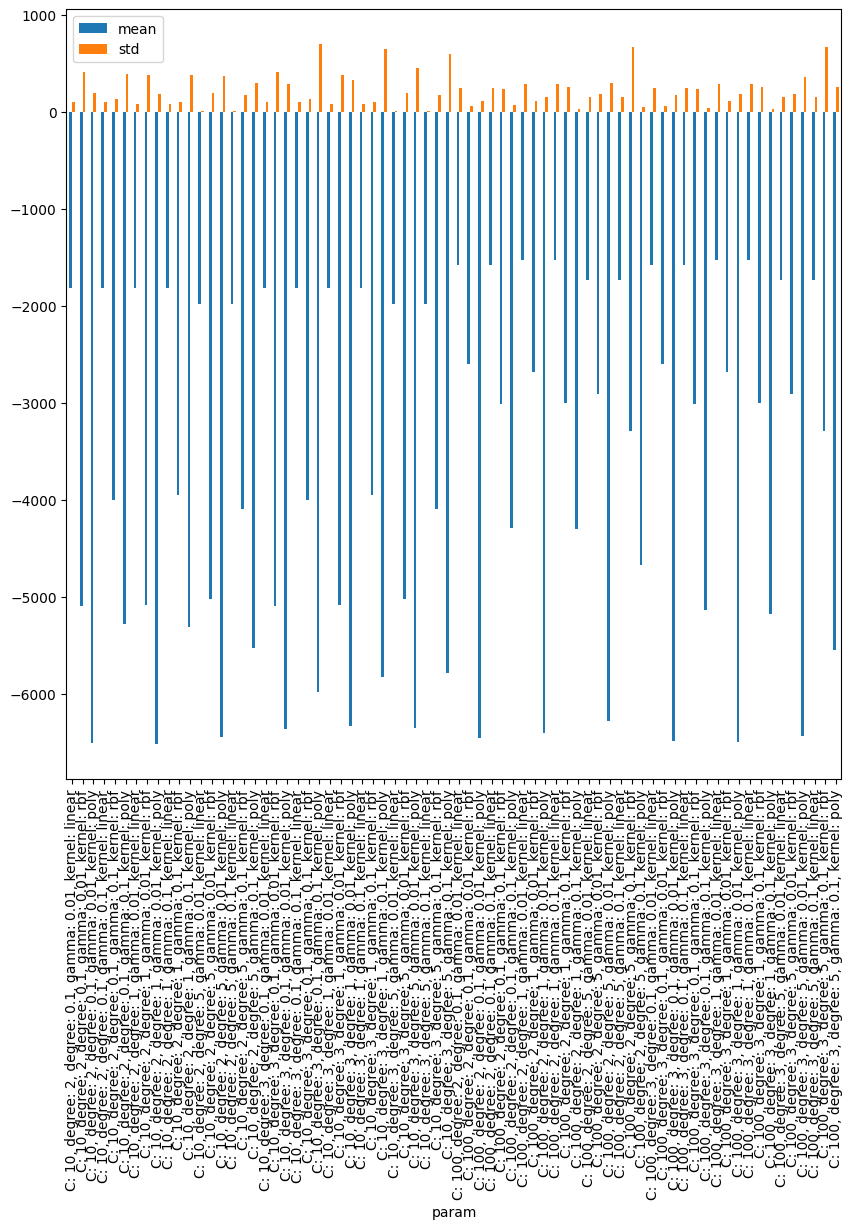

In [74]:
df_plot = pd.DataFrame()

df_plot['param'] = [f"C: { index['C'] }, degree: { index['degree'] }, degree: { index['epsilon'] }, gamma: { index['gamma'] }, kernel: { index['kernel'] }" for index in params]
df_plot['mean'] = means
df_plot['std'] = stds

df_plot.plot.bar(x='param',y= ['mean','std'],figsize = (10,10))

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'Plot')

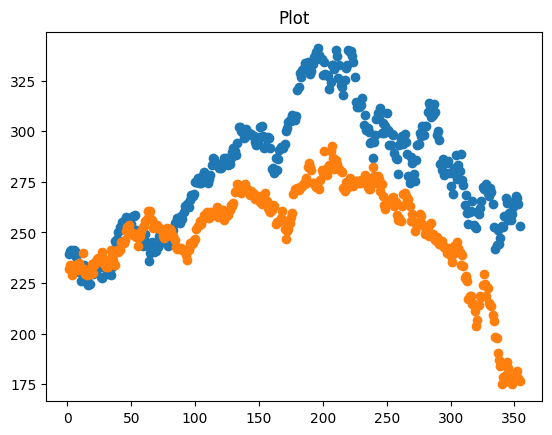

In [75]:
svr = SVR(kernel = grid_result.best_params_['kernel'], degree = grid_result.best_params_['degree'], C = grid_result.best_params_['C'], epsilon = grid_result.best_params_['epsilon'], gamma = grid_result.best_params_['gamma'])
svr_grid_pred = svr.fit(X_train_1, Y_train_1).predict(X_test_1)
plt.scatter(range(1, np.count_nonzero(Y_test_1) + 1), Y_test_1)
plt.scatter(range(1, np.count_nonzero(svr_grid_pred) + 1), svr_grid_pred)
plt.title(label = 'Plot')

### Option 2

In [76]:
#a
for EST in regression:
    model = regression[EST]
if (EST == 'LR'):
    params = params_LR
else:
    params = params_SVR

grid = GridSearchCV(estimator=model, n_jobs = 1,
    verbose = 10,
    cv = 2,
    scoring = 'neg_mean_squared_error',
    param_grid = params)

grid_result = grid.fit(X_train_2, Y_train_2)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV 1/2; 1/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear.....
[CV 1/2; 1/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-273.120 total time=   0.0s
[CV 2/2; 1/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear.....
[CV 2/2; 1/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-266.874 total time=   0.0s
[CV 1/2; 2/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf........
[CV 1/2; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-937.575 total time=   0.0s
[CV 2/2; 2/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf........
[CV 2/2; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-815.670 total time=   0.0s
[CV 1/2; 3/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.......
[CV 1/2; 3/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5910.728 total tim

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 5/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-234.094 total time=   0.0s
[CV 1/2; 6/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly........
[CV 1/2; 6/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-2160.065 total time=   0.0s
[CV 2/2; 6/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly........
[CV 2/2; 6/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-2711.665 total time=   0.0s
[CV 1/2; 7/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=linear.......
[CV 1/2; 7/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-272.418 total time=   0.0s
[CV 2/2; 7/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=linear.......
[CV 2/2; 7/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-265.393 total time=   0.0s
[CV 1/2; 8/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf..........
[CV 1/2; 8/72] END C=10, degree=2, epsilon=1, gamma=0.01,

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 11/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-235.836 total time=   0.0s
[CV 1/2; 12/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=poly.........
[CV 1/2; 12/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-2151.543 total time=   0.0s
[CV 2/2; 12/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=poly.........
[CV 2/2; 12/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-2704.159 total time=   0.0s
[CV 1/2; 13/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear......
[CV 1/2; 13/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-267.471 total time=   0.0s
[CV 2/2; 13/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear......
[CV 2/2; 13/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-257.904 total time=   0.0s
[CV 1/2; 14/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 1/2; 14/72] END C=10, degree=2, epsilon=5, gamma=0.01,

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 19/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-273.120 total time=   0.0s
[CV 2/2; 19/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=linear....
[CV 2/2; 19/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-266.874 total time=   0.0s
[CV 1/2; 20/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf.......
[CV 1/2; 20/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-937.575 total time=   0.0s
[CV 2/2; 20/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf.......
[CV 2/2; 20/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-815.670 total time=   0.0s
[CV 1/2; 21/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly......
[CV 1/2; 21/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-6174.810 total time=   0.0s
[CV 2/2; 21/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly......
[CV 2/2; 21/72] END C=10, degree=3, epsilon=0.1

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 25/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-272.418 total time=   0.0s
[CV 2/2; 25/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear......
[CV 2/2; 25/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-265.393 total time=   0.0s
[CV 1/2; 26/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=rbf.........
[CV 1/2; 26/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-936.705 total time=   0.0s
[CV 2/2; 26/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=rbf.........
[CV 2/2; 26/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-823.456 total time=   0.0s
[CV 1/2; 27/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly........
[CV 1/2; 27/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-6170.677 total time=   0.0s
[CV 2/2; 27/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly........
[CV 2/2; 27/72] END C=10, degree=3, epsilon=1, gamma=0.01

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\

[CV 2/2; 31/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-257.904 total time=   0.0s
[CV 1/2; 32/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 1/2; 32/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-945.191 total time=   0.0s
[CV 2/2; 32/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 2/2; 32/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-847.423 total time=   0.0s
[CV 1/2; 33/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=poly........
[CV 1/2; 33/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=poly;, score=-6169.374 total time=   0.0s
[CV 2/2; 33/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=poly........
[CV 2/2; 33/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=poly;, score=-7603.617 total time=   0.0s
[CV 1/2; 34/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=linear.......
[CV 1/2; 34/72] END C=10, degree=3, epsilon=5, gamma=0.1, 

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-270.790 total time=   0.0s
[CV 2/2; 37/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 2/2; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-267.363 total time=   0.0s
[CV 1/2; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 1/2; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-225.153 total time=   0.0s
[CV 2/2; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 2/2; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-208.830 total time=   0.0s
[CV 1/2; 39/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 1/2; 39/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-4180.936 total time=   0.0s
[CV 2/2; 39/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 2/2; 39/72] END C=100, degree=2, epsil

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 43/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-265.159 total time=   0.0s
[CV 1/2; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 1/2; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-229.222 total time=   0.0s
[CV 2/2; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 2/2; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-206.841 total time=   0.0s
[CV 1/2; 45/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly.......
[CV 1/2; 45/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-4182.473 total time=   0.0s
[CV 2/2; 45/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly.......
[CV 2/2; 45/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-4951.845 total time=   0.0s
[CV 1/2; 46/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear......
[CV 1/2; 46/72] END C=100, degree=2, epsilon=1, gamma

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 46/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-265.159 total time=   0.0s
[CV 1/2; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 1/2; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-76.625 total time=   0.0s
[CV 2/2; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 2/2; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-74.740 total time=   0.0s
[CV 1/2; 48/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly........
[CV 1/2; 48/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-1189.151 total time=   0.0s
[CV 2/2; 48/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly........
[CV 2/2; 48/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-1561.786 total time=   0.0s
[CV 1/2; 49/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear.....
[CV 1/2; 49/72] END C=100, degree=2, epsilon=5, gamma=0.01, 

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 50/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-204.161 total time=   0.0s
[CV 1/2; 51/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly.......
[CV 1/2; 51/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly;, score=-4168.695 total time=   0.0s
[CV 2/2; 51/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly.......
[CV 2/2; 51/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly;, score=-4915.018 total time=   0.0s
[CV 1/2; 52/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear......
[CV 1/2; 52/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-265.541 total time=   0.0s
[CV 2/2; 52/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear......
[CV 2/2; 52/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-260.002 total time=   0.0s
[CV 1/2; 53/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 1/2; 53/72] END C=100, degree=2, epsilon=5, gamm

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-270.790 total time=   0.0s
[CV 2/2; 55/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 2/2; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-267.363 total time=   0.0s
[CV 1/2; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 1/2; 56/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-225.153 total time=   0.0s
[CV 2/2; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 2/2; 56/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-208.830 total time=   0.0s
[CV 1/2; 57/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 1/2; 57/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5855.061 total time=   0.0s
[CV 2/2; 57/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 2/2; 57/72] END C=100, degree=3, epsil

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 58/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-267.363 total time=   0.0s
[CV 1/2; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 1/2; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-78.833 total time=   0.0s
[CV 2/2; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 2/2; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-77.602 total time=   0.0s
[CV 1/2; 60/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 1/2; 60/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-593.760 total time=   0.0s
[CV 2/2; 60/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 2/2; 60/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-716.129 total time=   0.0s
[CV 1/2; 61/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear.....
[CV 1/2; 61/72] END C=100, degree=3, epsilon=1, gamm

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 61/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-265.159 total time=   0.0s
[CV 1/2; 62/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf........
[CV 1/2; 62/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-229.222 total time=   0.0s
[CV 2/2; 62/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf........
[CV 2/2; 62/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-206.841 total time=   0.0s
[CV 1/2; 63/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly.......
[CV 1/2; 63/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-5847.605 total time=   0.0s
[CV 2/2; 63/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly.......
[CV 2/2; 63/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-7402.272 total time=   0.0s
[CV 1/2; 64/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear......
[CV 1/2; 64/72] END C=100, degree=3, epsilon=1, gamma

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 64/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-265.159 total time=   0.0s
[CV 1/2; 65/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 1/2; 65/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-76.625 total time=   0.0s
[CV 2/2; 65/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 2/2; 65/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-74.740 total time=   0.0s
[CV 1/2; 66/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly........
[CV 1/2; 66/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-600.400 total time=   0.0s
[CV 2/2; 66/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly........
[CV 2/2; 66/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-712.294 total time=   0.0s
[CV 1/2; 67/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear.....
[CV 1/2; 67/72] END C=100, degree=3, epsilon=5, gamma=0.01, ke

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\

[CV 2/2; 68/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-204.161 total time=   0.0s
[CV 1/2; 69/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=poly.......
[CV 1/2; 69/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=poly;, score=-5815.820 total time=   0.0s
[CV 2/2; 69/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=poly.......
[CV 2/2; 69/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=poly;, score=-7142.945 total time=   0.0s
[CV 1/2; 70/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear......
[CV 1/2; 70/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-265.541 total time=   0.0s
[CV 2/2; 70/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear......
[CV 2/2; 70/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-260.002 total time=   0.0s
[CV 1/2; 71/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 1/2; 71/72] END C=100, degree=3, epsilon=5, gamm

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

In [77]:
# Show Best Parameters for both models
print('Best params: ',grid_result.best_params_)
print('Best score: ', grid_result.best_score_)

Best params:  {'C': 100, 'degree': 2, 'epsilon': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score:  -75.6827015100263


In [78]:
# Show Score for each parameter combination for both model
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    

-269.996910 (3.123050) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
-876.622349 (60.952578) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
-6732.272488 (821.544310) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
-269.996910 (3.123050) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
-258.157987 (24.063580) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
-2435.865013 (275.800227) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
-268.905845 (3.512452) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'linear'}
-880.080399 (56.624561) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}
-6715.884575 (805.014517) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'poly'}
-268.905845 (3.512452) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.1, 'kern

<AxesSubplot:xlabel='param'>

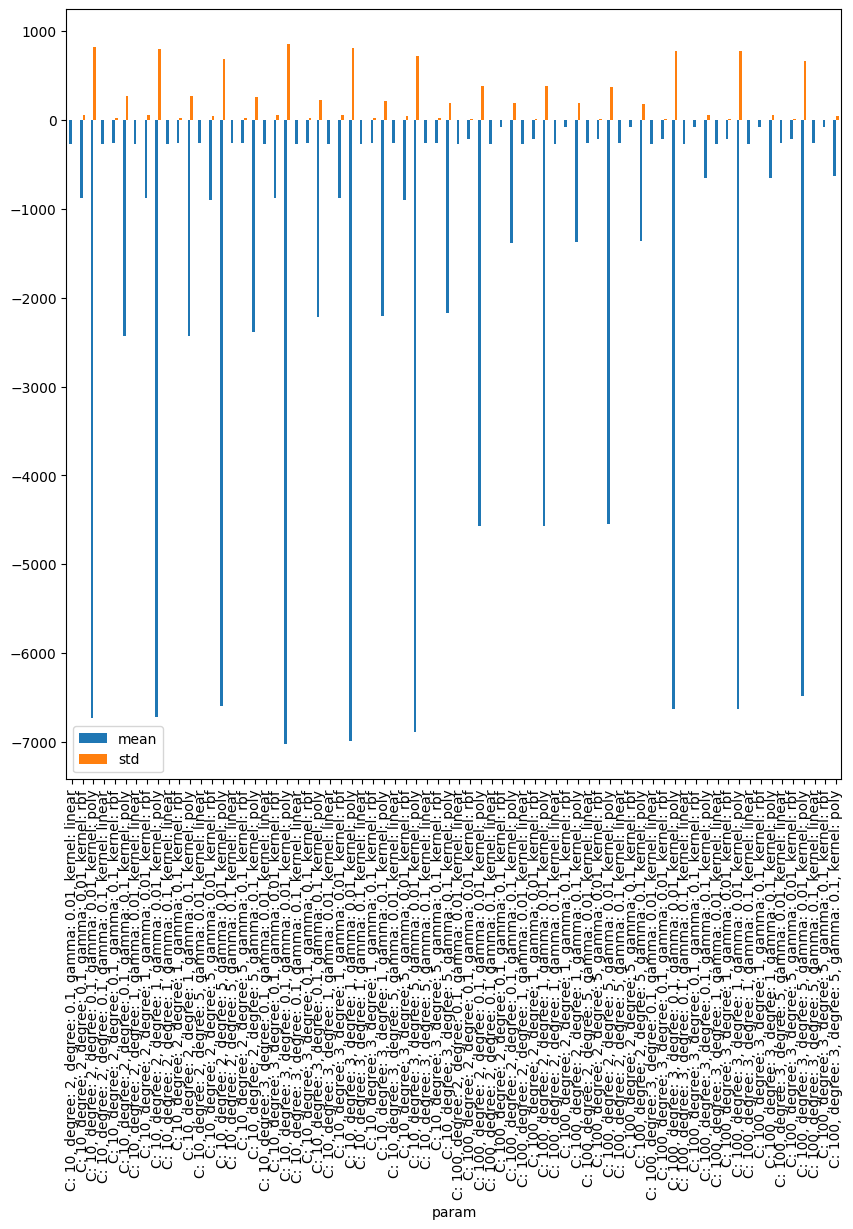

In [79]:
df_plot = pd.DataFrame()

df_plot['param'] = [f"C: { index['C'] }, degree: { index['degree'] }, degree: { index['epsilon'] }, gamma: { index['gamma'] }, kernel: { index['kernel'] }" for index in params]
df_plot['mean'] = means
df_plot['std'] = stds

df_plot.plot.bar(x='param',y= ['mean','std'],figsize = (10,10))

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'Plot')

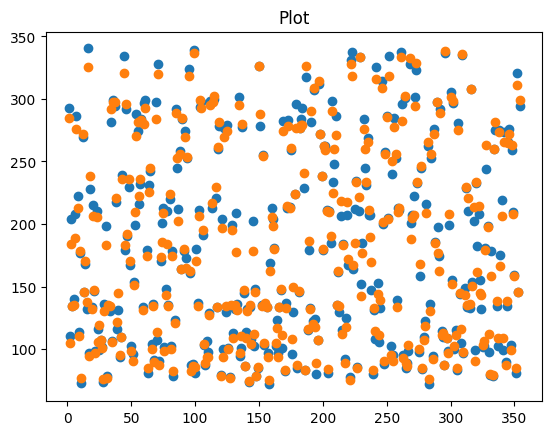

In [80]:
svr = SVR(kernel = grid_result.best_params_['kernel'], degree = grid_result.best_params_['degree'], C = grid_result.best_params_['C'], epsilon = grid_result.best_params_['epsilon'], gamma = grid_result.best_params_['gamma'])
svr_grid_pred = svr.fit(X_train_2, Y_train_2).predict(X_test_2)
plt.scatter(range(1, np.count_nonzero(Y_test_2) + 1), Y_test_2)
plt.scatter(range(1, np.count_nonzero(svr_grid_pred) + 1), svr_grid_pred)
plt.title(label = 'Plot')

## Random Search

In [81]:
regression = { 'LR': LinearRegression(), 'SVR': SVR(), }

In [82]:
fit_intercept = [True, False]
normalize = [True, False]
params_LR = dict( fit_intercept = fit_intercept, normalize = normalize)

In [83]:
kernel = ['linear', 'rbf', 'poly']
C_list = list(np.linspace(0.1, 150, 5, dtype = float))
ep_list = list(np.linspace(0.1, 1, 5, dtype = float))
gamma = list(np.linspace(0.01, 0.1, 5, dtype = float))
degree = [2, 3]
params_SVR = dict(kernel = kernel, C = C_list, epsilon = ep_list, gamma = gamma, degree = degree)

### Option 1

In [84]:
#a
k=2
for EST in regression:
    model = regression[EST]
    if (EST == 'LR'):
        params = params_LR
    else:
        params = params_SVR

    grid_rand = RandomizedSearchCV( estimator=model, 
    n_jobs = 1,
    verbose = 10,
    cv = k,
    scoring = 'neg_mean_squared_error',
    param_distributions=params )

    grid_rand_result = grid_rand.fit(X_train_1, Y_train_1)

c:\Python36\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2; 1/4] START fit_intercept=True, normalize=True..........................
[CV 1/2; 1/4] END fit_intercept=True, normalize=True;, score=-1210.619 total time=   0.0s
[CV 2/2; 1/4] START fit_intercept=True, normalize=True..........................
[CV 2/2; 1/4] END fit_intercept=True, normalize=True;, score=-1884.439 total time=   0.0s
[CV 1/2; 2/4] START fit_intercept=True, normalize=False.........................
[CV 1/2; 2/4] END fit_intercept=True, normalize=False;, score=-1210.619 total time=   0.0s
[CV 2/2; 2/4] START fit_intercept=True, normalize=False.........................
[CV 2/2; 2/4] END fit_intercept=True, normalize=False;, score=-1884.439 total time=   0.0s
[CV 1/2; 3/4] START fit_intercept=False, normalize=True.........................
[CV 1/2; 3/4] END fit_intercept=False, normalize=True;, score=-5574.883 total time=   0.0s
[CV 2/2; 3/4] START fit_intercept=False, normalize=True.........................
[C

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 4/10] END C=112.525, degree=3, epsilon=0.325, gamma=0.1, kernel=poly;, score=-5112.906 total time=   0.0s
[CV 1/2; 5/10] START C=75.05, degree=2, epsilon=0.1, gamma=0.1, kernel=poly.....
[CV 1/2; 5/10] END C=75.05, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-4375.119 total time=   0.0s
[CV 2/2; 5/10] START C=75.05, degree=2, epsilon=0.1, gamma=0.1, kernel=poly.....
[CV 2/2; 5/10] END C=75.05, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-4456.736 total time=   0.0s
[CV 1/2; 6/10] START C=75.05, degree=2, epsilon=0.775, gamma=0.05500000000000001, kernel=linear
[CV 1/2; 6/10] END C=75.05, degree=2, epsilon=0.775, gamma=0.05500000000000001, kernel=linear;, score=-1301.869 total time=   0.0s
[CV 2/2; 6/10] START C=75.05, degree=2, epsilon=0.775, gamma=0.05500000000000001, kernel=linear
[CV 2/2; 6/10] END C=75.05, degree=2, epsilon=0.775, gamma=0.05500000000000001, kernel=linear;, score=-1859.426 total time=   0.0s
[CV 1/2; 7/10] START C=75.05, degree=2, epsilon

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 8/10] END C=150.0, degree=2, epsilon=0.1, gamma=0.0325, kernel=linear;, score=-1323.077 total time=   0.0s
[CV 2/2; 8/10] START C=150.0, degree=2, epsilon=0.1, gamma=0.0325, kernel=linear
[CV 2/2; 8/10] END C=150.0, degree=2, epsilon=0.1, gamma=0.0325, kernel=linear;, score=-1830.721 total time=   0.0s
[CV 1/2; 9/10] START C=37.575, degree=2, epsilon=0.775, gamma=0.05500000000000001, kernel=rbf
[CV 1/2; 9/10] END C=37.575, degree=2, epsilon=0.775, gamma=0.05500000000000001, kernel=rbf;, score=-2961.823 total time=   0.0s
[CV 2/2; 9/10] START C=37.575, degree=2, epsilon=0.775, gamma=0.05500000000000001, kernel=rbf
[CV 2/2; 9/10] END C=37.575, degree=2, epsilon=0.775, gamma=0.05500000000000001, kernel=rbf;, score=-3083.087 total time=   0.0s
[CV 1/2; 10/10] START C=150.0, degree=3, epsilon=0.55, gamma=0.0775, kernel=poly
[CV 1/2; 10/10] END C=150.0, degree=3, epsilon=0.55, gamma=0.0775, kernel=poly;, score=-5159.455 total time=   0.0s
[CV 2/2; 10/10] START C=150.0, degree=3, eps

In [85]:
print('Best params: ',grid_rand_result.best_params_)
print('Best score: ', grid_rand_result.best_score_)

Best params:  {'kernel': 'linear', 'gamma': 0.0325, 'epsilon': 0.1, 'degree': 2, 'C': 150.0}
Best score:  -1576.8989456403017


In [86]:
means = grid_rand_result.cv_results_['mean_test_score']
stds = grid_rand_result.cv_results_['std_test_score']
params = grid_rand_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-6053.818522 (639.885934) with: {'kernel': 'rbf', 'gamma': 0.05500000000000001, 'epsilon': 0.775, 'degree': 2, 'C': 0.1}
-5362.871885 (537.775025) with: {'kernel': 'linear', 'gamma': 0.05500000000000001, 'epsilon': 0.1, 'degree': 2, 'C': 0.1}
-1591.674593 (283.432340) with: {'kernel': 'linear', 'gamma': 0.0775, 'epsilon': 0.55, 'degree': 2, 'C': 37.575}
-5089.367015 (23.539244) with: {'kernel': 'poly', 'gamma': 0.1, 'epsilon': 0.325, 'degree': 3, 'C': 112.525}
-4415.927391 (40.808545) with: {'kernel': 'poly', 'gamma': 0.1, 'epsilon': 0.1, 'degree': 2, 'C': 75.05}
-1580.647465 (278.778490) with: {'kernel': 'linear', 'gamma': 0.05500000000000001, 'epsilon': 0.775, 'degree': 2, 'C': 75.05}
-1579.552696 (249.549072) with: {'kernel': 'linear', 'gamma': 0.01, 'epsilon': 0.1, 'degree': 2, 'C': 75.05}
-1576.898946 (253.821868) with: {'kernel': 'linear', 'gamma': 0.0325, 'epsilon': 0.1, 'degree': 2, 'C': 150.0}
-3022.455364 (60.631914) with: {'kernel': 'rbf', 'gamma': 0.05500000000000001, 'epsi

<AxesSubplot:xlabel='param'>

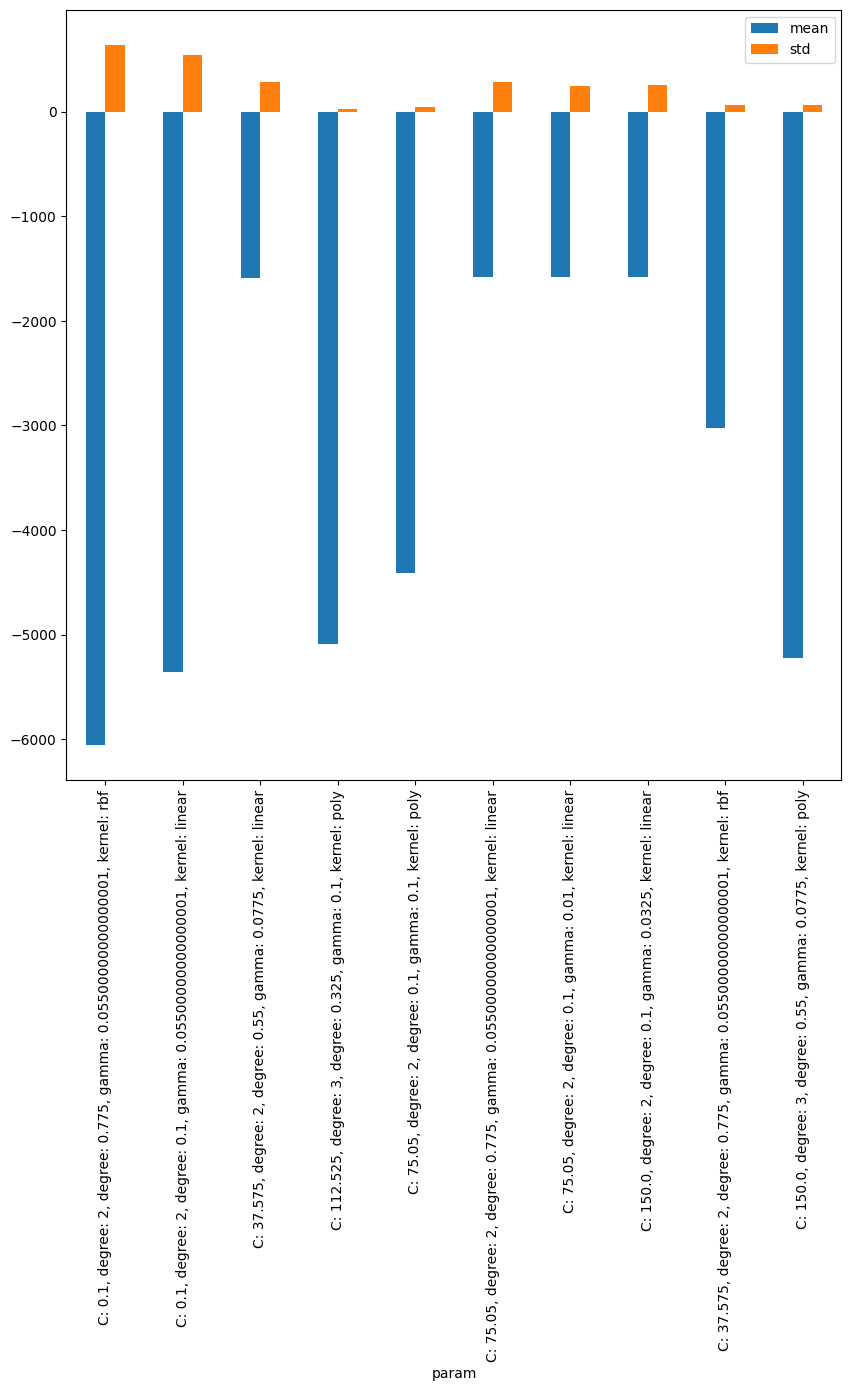

In [87]:
df_plot = pd.DataFrame()

df_plot['param'] = [f"C: { index['C'] }, degree: { index['degree'] }, degree: { index['epsilon'] }, gamma: { index['gamma'] }, kernel: { index['kernel'] }" for index in params]
df_plot['mean'] = means
df_plot['std'] = stds

df_plot.plot.bar(x = 'param', y = ['mean', 'std'], figsize = (10, 10))

### Option 2

In [89]:
#b
k=2
for EST in regression:
    model = regression[EST]
    if (EST == 'LR'):
        params = params_LR
    else:
        params = params_SVR

    grid_rand = RandomizedSearchCV( estimator=model, 
    n_jobs = 1,
    verbose = 10,
    cv = k,
    scoring = 'neg_mean_squared_error',
    param_distributions=params )

    grid_rand_result = grid_rand.fit(X_train_2, Y_train_2)

c:\Python36\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2; 1/4] START fit_intercept=True, normalize=True..........................
[CV 1/2; 1/4] END fit_intercept=True, normalize=True;, score=-259.481 total time=   0.0s
[CV 2/2; 1/4] START fit_intercept=True, normalize=True..........................
[CV 2/2; 1/4] END fit_intercept=True, normalize=True;, score=-251.916 total time=   0.0s
[CV 1/2; 2/4] START fit_intercept=True, normalize=False.........................
[CV 1/2; 2/4] END fit_intercept=True, normalize=False;, score=-259.481 total time=   0.0s
[CV 2/2; 2/4] START fit_intercept=True, normalize=False.........................
[CV 2/2; 2/4] END fit_intercept=True, normalize=False;, score=-251.916 total time=   0.0s
[CV 1/2; 3/4] START fit_intercept=False, normalize=True.........................
[CV 1/2; 3/4] END fit_intercept=False, normalize=True;, score=-31304.894 total time=   0.0s
[CV 2/2; 3/4] START fit_intercept=False, normalize=True.........................
[CV 2

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\

[CV 1/2; 5/10] END C=112.525, degree=3, epsilon=1.0, gamma=0.01, kernel=linear;, score=-271.832 total time=   0.0s
[CV 2/2; 5/10] START C=112.525, degree=3, epsilon=1.0, gamma=0.01, kernel=linear
[CV 2/2; 5/10] END C=112.525, degree=3, epsilon=1.0, gamma=0.01, kernel=linear;, score=-265.159 total time=   0.0s
[CV 1/2; 6/10] START C=37.575, degree=2, epsilon=0.775, gamma=0.01, kernel=linear
[CV 1/2; 6/10] END C=37.575, degree=2, epsilon=0.775, gamma=0.01, kernel=linear;, score=-272.119 total time=   0.0s
[CV 2/2; 6/10] START C=37.575, degree=2, epsilon=0.775, gamma=0.01, kernel=linear
[CV 2/2; 6/10] END C=37.575, degree=2, epsilon=0.775, gamma=0.01, kernel=linear;, score=-265.406 total time=   0.0s
[CV 1/2; 7/10] START C=75.05, degree=2, epsilon=0.775, gamma=0.1, kernel=poly...
[CV 1/2; 7/10] END C=75.05, degree=2, epsilon=0.775, gamma=0.1, kernel=poly;, score=-1187.234 total time=   0.0s
[CV 2/2; 7/10] START C=75.05, degree=2, epsilon=0.775, gamma=0.1, kernel=poly...
[CV 2/2; 7/10] END

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 8/10] END C=37.575, degree=2, epsilon=0.55, gamma=0.01, kernel=rbf;, score=-332.283 total time=   0.0s
[CV 2/2; 8/10] START C=37.575, degree=2, epsilon=0.55, gamma=0.01, kernel=rbf...
[CV 2/2; 8/10] END C=37.575, degree=2, epsilon=0.55, gamma=0.01, kernel=rbf;, score=-278.501 total time=   0.0s
[CV 1/2; 9/10] START C=37.575, degree=2, epsilon=0.325, gamma=0.0775, kernel=poly
[CV 1/2; 9/10] END C=37.575, degree=2, epsilon=0.325, gamma=0.0775, kernel=poly;, score=-1481.553 total time=   0.0s
[CV 2/2; 9/10] START C=37.575, degree=2, epsilon=0.325, gamma=0.0775, kernel=poly
[CV 2/2; 9/10] END C=37.575, degree=2, epsilon=0.325, gamma=0.0775, kernel=poly;, score=-2052.404 total time=   0.0s
[CV 1/2; 10/10] START C=112.525, degree=2, epsilon=0.55, gamma=0.05500000000000001, kernel=linear
[CV 1/2; 10/10] END C=112.525, degree=2, epsilon=0.55, gamma=0.05500000000000001, kernel=linear;, score=-270.995 total time=   0.0s
[CV 2/2; 10/10] START C=112.525, degree=2, epsilon=0.55, gamma=0.05

In [90]:
print('Best params: ',grid_rand_result.best_params_)
print('Best score: ', grid_rand_result.best_score_)

Best params:  {'kernel': 'linear', 'gamma': 0.05500000000000001, 'epsilon': 0.55, 'degree': 2, 'C': 112.525}
Best score:  -268.1120669372718


In [91]:
means = grid_rand_result.cv_results_['mean_test_score']
stds = grid_rand_result.cv_results_['std_test_score']
params = grid_rand_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-4915.100393 (458.265434) with: {'kernel': 'poly', 'gamma': 0.01, 'epsilon': 0.775, 'degree': 2, 'C': 75.05}
-268.613390 (3.207145) with: {'kernel': 'linear', 'gamma': 0.1, 'epsilon': 0.775, 'degree': 2, 'C': 75.05}
-6857.918099 (838.739046) with: {'kernel': 'poly', 'gamma': 0.0775, 'epsilon': 0.1, 'degree': 3, 'C': 0.1}
-878.763369 (76.900390) with: {'kernel': 'poly', 'gamma': 0.1, 'epsilon': 1.0, 'degree': 3, 'C': 37.575}
-268.495748 (3.336436) with: {'kernel': 'linear', 'gamma': 0.01, 'epsilon': 1.0, 'degree': 3, 'C': 112.525}
-268.762645 (3.356177) with: {'kernel': 'linear', 'gamma': 0.01, 'epsilon': 0.775, 'degree': 2, 'C': 37.575}
-1410.674628 (223.441069) with: {'kernel': 'poly', 'gamma': 0.1, 'epsilon': 0.775, 'degree': 2, 'C': 75.05}
-305.391940 (26.891436) with: {'kernel': 'rbf', 'gamma': 0.01, 'epsilon': 0.55, 'degree': 2, 'C': 37.575}
-1766.978595 (285.425593) with: {'kernel': 'poly', 'gamma': 0.0775, 'epsilon': 0.325, 'degree': 2, 'C': 37.575}
-268.112067 (2.883318) with: 

<AxesSubplot:xlabel='param'>

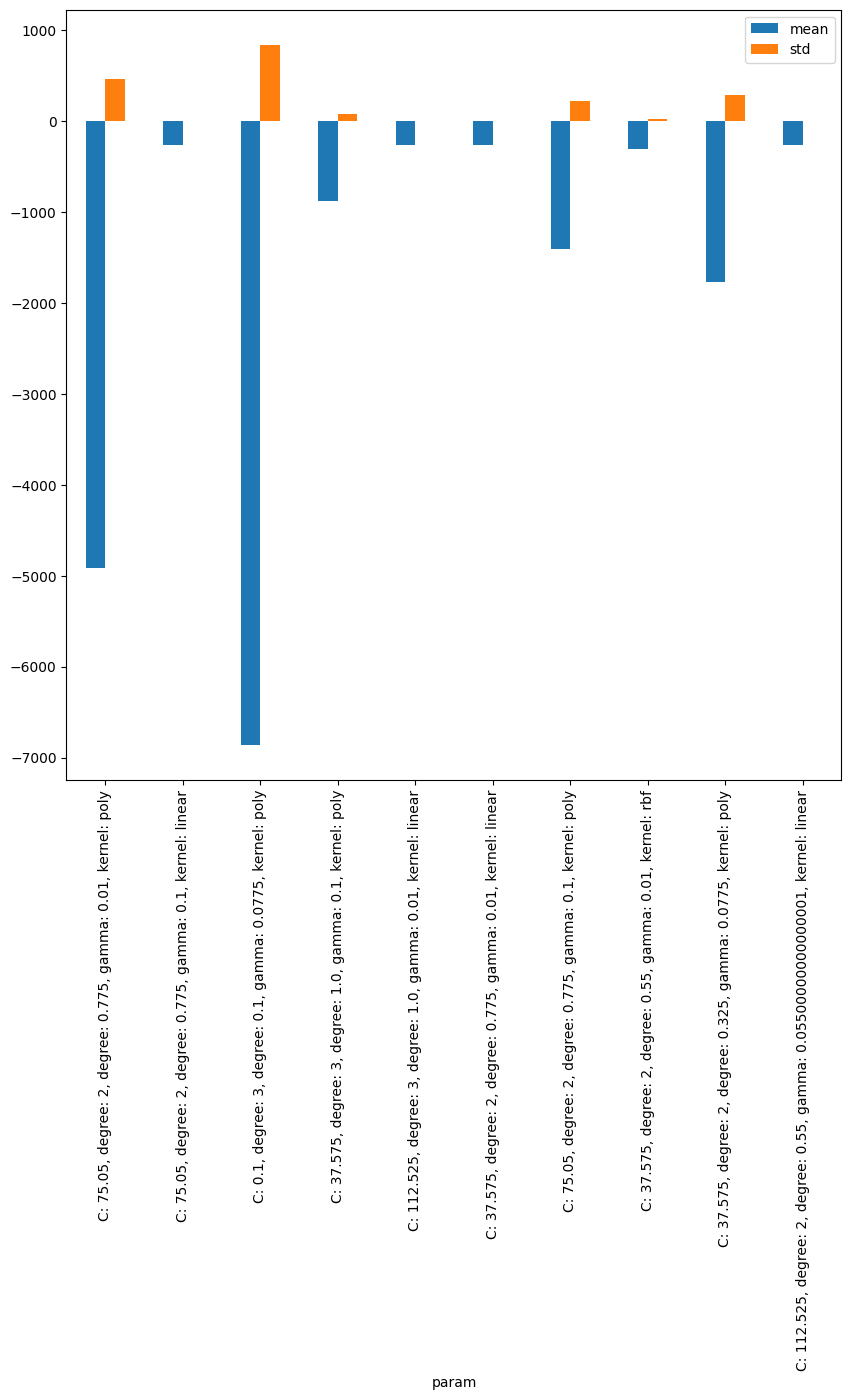

In [92]:
df_plot = pd.DataFrame()

df_plot['param'] = [f"C: { index['C'] }, degree: { index['degree'] }, degree: { index['epsilon'] }, gamma: { index['gamma'] }, kernel: { index['kernel'] }" for index in params]
df_plot['mean'] = means
df_plot['std'] = stds

df_plot.plot.bar(x = 'param', y = ['mean', 'std'], figsize = (10, 10))

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'Plot')

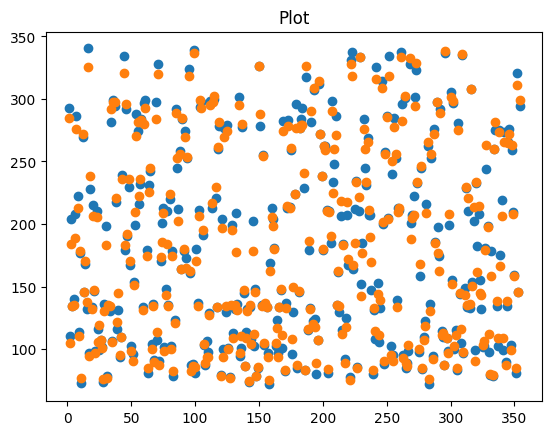

In [95]:
svr = SVR(kernel = grid_result.best_params_['kernel'], degree = grid_result.best_params_['degree'], C = grid_result.best_params_['C'], epsilon = grid_result.best_params_['epsilon'], gamma = grid_result.best_params_['gamma'])
svr_grid_pred = svr.fit(X_train_2, Y_train_2).predict(X_test_2)
plt.scatter(range(1, np.count_nonzero(Y_test_2) + 1), Y_test_2)
plt.scatter(range(1, np.count_nonzero(svr_grid_pred) + 1), svr_grid_pred)
plt.title(label = 'Plot')